In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100) 
y = np.sqrt(15**2 - x**2)
y=np.hstack([y,-y]) # np.hstack stacks arrays of the points in a sequence horizontally (column wise).
x=np.hstack([x,-x])

In [3]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

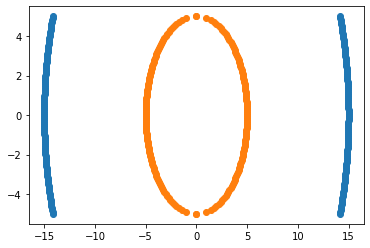

In [4]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [5]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2']) # tabulating the data
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

,X1,X2,Y
0,14.142136,-5.00000,0
1,14.177443,-4.89899,0
2,14.211945,-4.79798,0
3,14.245648,-4.69697,0
4,14.278556,-4.59596,0


In [9]:
# Independent and Dependent features
X = df.iloc[:, :2]  # selecting multiple rows and the first two columns
y = df.Y
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [11]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
y_train

136    1
64     0
55     0
106    0
100    1
      ..
123    1
192    0
117    0
47     0
172    0
Name: Y, Length: 320, dtype: int64

In [12]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

41.25

Using Linear kernel on such a data gives us a low accuracy score, let us increase the features now and apply an rbf/polynomial kernel. 

In [13]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

100.0

The rbf kernel on such a data gives a very good accuracy score. 

  Let's try using a Polynomial Kernel now.

In [14]:
# Finding all the second degree components for a polynomial kernel like X1^2, X2^2, and X1X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,14.142136,-5.00000,0,200.000000,25.000000,-70.710678
1,14.177443,-4.89899,0,200.999898,24.000102,-69.455151
2,14.211945,-4.79798,0,201.979390,23.020610,-68.188627
3,14.245648,-4.69697,0,202.938476,22.061524,-66.911375
4,14.278556,-4.59596,0,203.877155,21.122845,-65.623665


In [15]:
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
136,-4.810457,1.363636,23.140496,1.859504,-6.559714
64,14.928322,1.464646,222.854811,2.145189,21.864715
55,14.989708,0.555556,224.691358,0.308642,8.327616
106,-14.342012,4.393939,205.693297,19.306703,-63.017930
100,-0.000000,5.000000,0.000000,25.000000,-0.000000
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-14.372570,-4.292929,206.570758,18.429242,61.700425
117,-14.636360,3.282828,214.223038,10.776962,-48.048657
47,14.997874,-0.252525,224.936231,0.063769,-3.787342


In [17]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

This isn't really a desired sort of kernel we'd like to use, so let's plot ${x_1^2}$ and ${x_2^2}$ on the x, and y axes. 

In [19]:
#Adding higher order terms as new features to increase it's complexity, an generate a polynomial kernel
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()



In [20]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

100.0

So, even a polynomial kernel works well and does a good job in classifying this simple scatter plot, with 100% accuracy!